Import packages and training data:

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

os.chdir(r"c:\Users\JosephVovrosh\personal_git")
df_train_raw = pd.read_csv('data/Titanic/train.csv')
df_test_raw = pd.read_csv('data/Titanic/test.csv')

In the following treatement of data we implement the following clean up:

- Names: Get titles only
- Survived: unchanged
- Pclass: unchanged
- Sex: 0 for man, 1 for woman
- Age: Group into grops of 5 years
- SibSp: Use to create family sizes
- Parch: Use to create family sizes
- Ticket: Ignore for now
- Fare: Group into grops of $20
- Cabin: Split into Cabin and Cabin number
- Embarked: 1 for C, 2 for S, 3 for Q

Note: any missing data implemented as -1

In [2]:
def get_missing_coordinates(df):
    """Return list of (row_index, column_name) where NaNs are found."""
    return list(zip(*np.where(pd.isna(df))))

def get_cabin_letter(cabin):
    """Extract the first letter of the cabin string or return NaN if null."""
    return cabin[0] if isinstance(cabin, str) and cabin else np.nan

def get_cabin_number(cabin):
    """Extract the numeric part of the cabin string or return -1 if none."""
    if not isinstance(cabin, str):
        return -1
    num = ''.join(filter(str.isdigit, cabin))
    return int(num) if num else -1

In [3]:
# Initialize processed DataFrame
df_train = pd.DataFrame()

# Encode 'Sex' column
df_train['Sex'] = df_train_raw['Sex'].map({'male': 0, 'female': 1})

# Copy 'Pclass'
df_train['Pclass'] = df_train_raw['Pclass']

# Extract title from 'Name'
pattern = r"\b(Master|Mr|Mrs|Ms|Dr|Miss|Sir|Rev|Capt|Lady|Col|Countess|Don|Jonkheer|Major|Mlle|Mme)\."
titles = df_train_raw['Name'].str.extract(pattern, flags=re.IGNORECASE, expand=False).fillna('Unknown').str.capitalize()
title_to_int = {title: i for i, title in enumerate(sorted(titles.unique()))}
df_train['Title'] = titles.map(title_to_int)

# Bin 'Age'
df_train_raw['Age'] = df_train_raw['Age'].fillna(-1)
age_bins = np.arange(-5, df_train_raw['Age'].max() + 10, 5)
df_train['Age'] = pd.cut(df_train_raw['Age'], bins=age_bins, labels=False, right=False, include_lowest=True)

# Compute 'FamilySize'
df_train['FamilySize'] = df_train_raw['SibSp'] + df_train_raw['Parch']

# Bin 'Fare'
df_train_raw['Fare'] = df_train_raw['Fare'].fillna(-1)
fare_bins = np.arange(-20, df_train_raw['Fare'].max() + 20, 20)
df_train['Fare'] = pd.cut(df_train_raw['Fare'], bins=fare_bins, labels=False, right=False, include_lowest=True)

# Extract and encode 'Cabin_Letter'
df_train['Cabin_Letter'] = df_train_raw['Cabin'].apply(get_cabin_letter)
df_train['Cabin_Letter'] = df_train['Cabin_Letter'].astype('category').cat.codes.replace(-1, -1)

# Extract 'Cabin_Number'
df_train['Cabin_Number'] = df_train_raw['Cabin'].apply(get_cabin_number)

# Encode 'Embarked'
df_train_raw['Embarked'] = df_train_raw['Embarked'].fillna(-1)
embarked_map = {-1: -1, 'C': 0, 'S': 1, 'Q': 2}
df_train['Embarked'] = df_train_raw['Embarked'].map(embarked_map)

# Copy 'Survived'
df_train['Survived'] = df_train_raw['Survived']

# Ensure all columns are numeric
df_train = df_train.apply(pd.to_numeric, errors='coerce')

# Check for missing values
missing_coords = get_missing_coordinates(df_train)
print(f"# of training data missing after further clean up: {len(missing_coords)}")

# of training data missing after further clean up: 0


Check how correlated the data is:

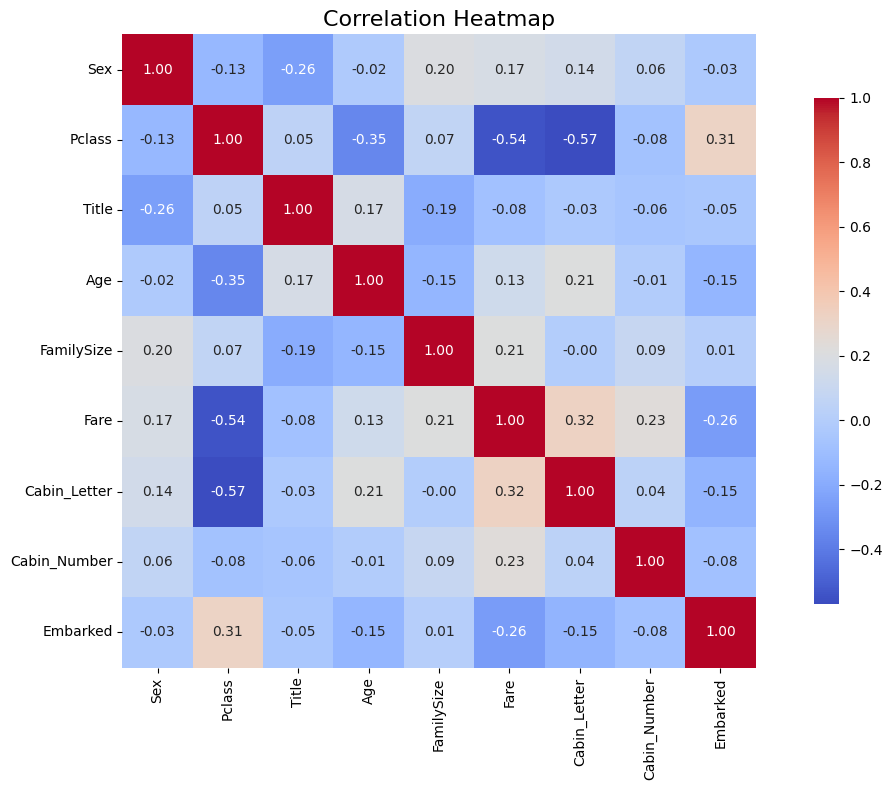

In [4]:
# Separate target variable
X = df_train.drop(columns='Survived')
y = df_train['Survived']

# Compute correlation matrix
corr = X.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    square=True, 
    cbar_kws={"shrink": 0.8}
)
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

In [5]:
# Initialize processed DataFrame
df_test = pd.DataFrame()

# Encode 'Sex' column
df_test['Sex'] = df_test_raw['Sex'].map({'male': 0, 'female': 1})

# Copy 'Pclass'
df_test['Pclass'] = df_test_raw['Pclass']

# Extract title from 'Name'
pattern = r"\b(Master|Mr|Mrs|Ms|Dr|Miss|Sir|Rev|Capt|Lady|Col|Countess|Don|Jonkheer|Major|Mlle|Mme)\."
titles = df_test_raw['Name'].str.extract(pattern, flags=re.IGNORECASE, expand=False).fillna('Unknown').str.capitalize()
title_to_int = {title: i for i, title in enumerate(sorted(titles.unique()))}
df_test['Title'] = titles.map(title_to_int)

# Bin 'Age'
df_test_raw['Age'] = df_test_raw['Age'].fillna(-1)
age_bins = np.arange(-5, df_test_raw['Age'].max() + 10, 5)
df_test['Age'] = pd.cut(df_test_raw['Age'], bins=age_bins, labels=False, right=False, include_lowest=True)

# Compute 'FamilySize'
df_test['FamilySize'] = df_test_raw['SibSp'] + df_test_raw['Parch']

# Bin 'Fare'
df_test_raw['Fare'] = df_test_raw['Fare'].fillna(-1)
fare_bins = np.arange(-20, df_test_raw['Fare'].max() + 20, 20)
df_test['Fare'] = pd.cut(df_test_raw['Fare'], bins=fare_bins, labels=False, right=False, include_lowest=True)

# Extract and encode 'Cabin_Letter'
df_test['Cabin_Letter'] = df_test_raw['Cabin'].apply(get_cabin_letter)
df_test['Cabin_Letter'] = df_test['Cabin_Letter'].astype('category').cat.codes.replace(-1, -1)

# Extract 'Cabin_Number'
df_test['Cabin_Number'] = df_test_raw['Cabin'].apply(get_cabin_number)

# Encode 'Embarked'
df_test_raw['Embarked'] = df_test_raw['Embarked'].fillna(-1)
embarked_map = {-1: -1, 'C': 0, 'S': 1, 'Q': 2}
df_test['Embarked'] = df_test_raw['Embarked'].map(embarked_map)

# Ensure all columns are numeric
df_test = df_test.apply(pd.to_numeric, errors='coerce')

# Check for missing values
missing_coords = get_missing_coordinates(df_test)
print(f"# of test data missing after further clean up: {len(missing_coords)}")

# of test data missing after further clean up: 0


Save clean data:

In [7]:
df_train.to_csv('Kaggle-Titanic/training_data.csv', index=False)
df_test.to_csv('Kaggle-Titanic/test_data.csv', index=False)